In [50]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
import umap.umap_ as umap
import random
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform


In [51]:
data_dir = './GSE61260/'

In [52]:
df = pd.read_csv(os.path.join(data_dir, 'combined.csv'))

df.head()

,Sample_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,Disease,characteristics_ch1_age,characteristics_ch1_bmi,characteristics_ch1_Sex_male
0,GSM1501013,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,...,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,normal control,70,27.1,1
1,GSM1501014,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,...,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,healthy obese,49,30.5,0
2,GSM1501015,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,...,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,normal control,76,25.3,0
3,GSM1501016,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,...,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,normal control,48,25.8,1
4,GSM1501017,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,...,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,normal control,73,23.5,0


In [53]:
le = LabelEncoder()

y = le.fit_transform(df['Disease'])

print(le.classes_)

X = df.drop(columns = ['Sample_ID', 'Disease'])
X.head()

['healthy obese' 'nafld' 'nash' 'normal control' 'pbc' 'psc']


,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283913,ENSG00000284032,ENSG00000284373,ENSG00000284387,ENSG00000284395,ENSG00000284505,ENSG00000284552,characteristics_ch1_age,characteristics_ch1_bmi,characteristics_ch1_Sex_male
0,8.002176,0.175238,4.949994,3.285351,0.959516,0.672894,59.325067,4.168056,8.104327,3.010408,...,0.903138,1.222211,0.132392,0.491394,-0.079424,-0.255411,3.071849,70,27.1,1
1,23.292853,-0.031148,5.657237,2.786927,1.203578,0.358625,46.002714,4.889903,7.588060,3.464364,...,-0.021741,0.487849,-0.066907,0.195198,0.178077,-0.190626,1.399320,49,30.5,0
2,10.557890,0.097413,7.680354,2.795125,0.789783,0.733455,43.835288,5.133417,9.559194,2.829070,...,0.424076,0.423539,-0.155705,0.086307,0.230390,-0.489850,1.632879,76,25.3,0
3,10.272135,0.066298,8.835539,3.166677,0.941032,0.755181,51.390227,4.168056,10.980774,2.733645,...,0.501803,0.357365,-0.321937,0.232894,-0.066718,-0.233382,2.117271,48,25.8,1
4,8.290414,-0.039647,5.792685,2.203175,0.846344,0.612263,55.423440,3.657327,10.710821,2.708227,...,0.120017,0.452607,-0.263615,0.443599,0.291308,-0.474034,3.032463,73,23.5,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)

(106, 21664)
(27, 21664)


In [55]:
pipeline_steps = [
    ('scaler', StandardScaler()),              
    ('feature_selection', SelectKBest(f_classif, k=500)), 
    ('classifier', SVC(random_state=42)) 
]

pipeline = Pipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)


Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', SelectKBest(k=500)),
                ('classifier', SVC(random_state=42))])



Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END classifier__C=31.622776601683793, classifier__gamma=1000.0, classifier__kernel=linear, feature_selection__k=817; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=1000.0, classifier__kernel=linear, feature_selection__k=817; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=1000.0, classifier__kernel=linear, feature_selection__k=817; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=1000.0, classifier__kernel=linear, feature_selection__k=817; total time=   0.2s
[CV] END classifier__C=0.03162277660168379, classifier__gamma=31.622776601683793, classifier__kernel=rbf, feature_selection__k=897; total time=   0.2s
[CV] END classifier__C=0.03162277660168379, classifier__gamma=31.622776601683793, classifier__kernel=rbf, feature_selection__k=897; total time=   0.2s
[CV] END classifier__C=31.62

/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END classifier__C=1000.0, classifier__gamma=1.0, classifier__kernel=linear, feature_selection__k=386; total time=   0.2s
[CV] END classifier__C=1000.0, classifier__gamma=1.0, classifier__kernel=linear, feature_selection__k=386; total time=   0.2s
[CV] END classifier__C=1000.0, classifier__gamma=1.0, classifier__kernel=linear, feature_selection__k=386; total time=   0.3s
[CV] END classifier__C=1000.0, classifier__gamma=1.0, classifier__kernel=linear, feature_selection__k=386; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=0.03162277660168379, classifier__kernel=poly, feature_selection__k=65; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=0.03162277660168379, classifier__kernel=poly, feature_selection__k=65; total time=   0.2s
[CV] END classifier__C=31.622776601683793, classifier__gamma=0.03162277660168379, classifier__kernel=poly, feature_selection__k=65; total time=   0.2s
[CV] END classifier__C=31.622776601683793, 

<Axes: >

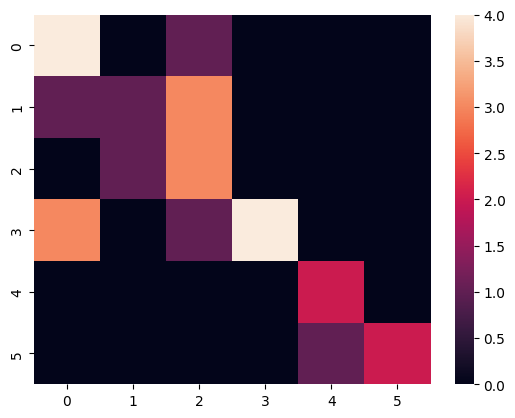

In [56]:
parameters = {
    
    # Hyperparameters for SelectKBest
    'feature_selection__k': randint(50, 1000), # Number of features to select, e.g., 50 to 999

    
    'classifier__kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'classifier__C': np.logspace(-3, 3, 5),
            'classifier__gamma':np.logspace(-3, 3, 5)}


random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=parameters,  
    n_iter=50,                        
    cv=5,                            
    scoring='accuracy',             
    verbose=2,                         
    random_state=1,                   
    n_jobs=-1                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_selector = best_pipeline_model.named_steps['feature_selection']
best_classifier = best_pipeline_model.named_steps['classifier']

selected_features_mask = best_selector.get_support()
selected_gene_names = X_train.columns[selected_features_mask]
print(f"\nNumber of selected genes: {len(selected_gene_names)}")
print("First 10 selected genes:", selected_gene_names[:10].tolist())

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)

In [57]:
pipeline_steps = [
    ('scaler', StandardScaler()),              
    ('feature_selection', PCA()), 
    ('classifier', SVC(random_state=42)) 
]

pipeline = Pipeline(pipeline_steps)
print("\nDefined Pipeline:")
print(pipeline)


Defined Pipeline:
Pipeline(steps=[('scaler', StandardScaler()), ('feature_selection', PCA()),
                ('classifier', SVC(random_state=42))])



Starting RandomizedSearchCV on Pipeline...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.

RandomizedSearchCV on Pipeline complete.

Best hyperparameters found for the pipeline:
{'classifier__C': np.float64(0.03162277660168379), 'classifier__gamma': np.float64(0.001), 'classifier__kernel': 'linear', 'feature_selection__n_components': 35}

Best cross-validation score:
0.5980043237186095

Best Pipeline Model:
Pipeline(steps=[('scaler', StandardScaler()),
                ('feature_selection', PCA(n_components=35)),
                ('classifier',
                 SVC(C=np.float64(0.03162277660168379), gamma=np.float64(0.001),
                     kernel='linear', random_state=42))])

--- Evaluation of Best Tuned Pipeline on Test Set ---
Accuracy: 0.7037

Classification Report:
                precision    recall  f1-score   support

 healthy obese       0.67      0.80      0.73         5
         nafld       0.56      1.00      0.71         5
          nash       1.00      0.75      0.86         4
normal control       0.67      0.50      0.57         8
           pbc       1.00 

/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: overflow encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:350: RuntimeWarning: invalid value encountered in matmul
  Q, _ = normalizer(A @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:351: RuntimeWarning: divide by zero encountered in matmul
  Q, _ = normalizer(A.T @ Q)
/Users/jaydn/Documents/GitHub/Human-Liver-RNA-Seq-Gene-Expression-Analysis/venv/lib/python3.12/site-packages/sklearn/utils/extmat

<Axes: >

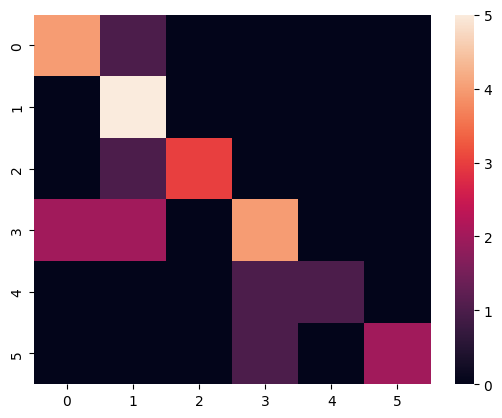

In [58]:
parameters = {
    
    # Hyperparameters for PCA
    'feature_selection__n_components': randint(2, 1000),

    
    'classifier__kernel':('linear', 'rbf', 'poly', 'sigmoid'),
              'classifier__C': np.logspace(-3, 3, 5),
            'classifier__gamma':np.logspace(-3, 3, 5)}


random_search_pipeline = RandomizedSearchCV(
    estimator=pipeline,                
    param_distributions=parameters,  
    n_iter=200,                        
    cv=5,                            
    scoring='f1_weighted',             
    verbose=1,                         
    random_state=1,                   
    n_jobs=-1                          
)

print("\nStarting RandomizedSearchCV on Pipeline...")
random_search_pipeline.fit(X_train, y_train)
print("RandomizedSearchCV on Pipeline complete.")

print("\nBest hyperparameters found for the pipeline:")
print(random_search_pipeline.best_params_)

print("\nBest cross-validation score:")
print(random_search_pipeline.best_score_)

best_pipeline_model = random_search_pipeline.best_estimator_
print("\nBest Pipeline Model:")
print(best_pipeline_model)

y_pred_tuned = best_pipeline_model.predict(X_test)

print("\n--- Evaluation of Best Tuned Pipeline on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=le.classes_))


best_scaler = best_pipeline_model.named_steps['scaler']
best_selector = best_pipeline_model.named_steps['feature_selection']
best_classifier = best_pipeline_model.named_steps['classifier']

conf_matrix = confusion_matrix(y_test, y_pred_tuned)
print("\nConfusion Matrix:")
sns.heatmap(conf_matrix)